In [ ]:
""" Load saved pairs of (data, basis set) and combine into single plots
"""

In [1]:
from pythonlib.tools.plottools import savefig
from pythonlib.dataset.dataset_analy.primitives import *
from pythonlib.dataset.dataset_preprocess.primitives import *
from pythonlib.dataset.dataset import Dataset, load_dataset, load_dataset_daily_helper
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import glob

In [ ]:
1. Same tasks across data
2. Only tasks with non-informative prims.

In [2]:
DIR = "/gorilla1/analyses/main/strokes_clustering_similarity"
WHICH_LEVEL = "trial"
# WHICH_TASK_KIND = "character"


In [6]:
path

'/gorilla1/analyses/main/strokes_clustering_similarity/trial-basis_Pancho/Pancho_220805_*/DS.pkl'

In [7]:
LIST_ANIMAL_DATE_BASIS = [
    ("Pancho", 230125, "Pancho"), #### CHARS
    ("Pancho", 230125, "Diego"),
    ("Pancho", 230126, "Pancho"),
    ("Pancho", 230126, "Diego"),
    ("Pancho", 230127, "Pancho"),
    ("Pancho", 230127, "Diego"),
    ("Diego", 230422, "Pancho"),
    ("Diego", 230422, "Diego"),
    ("Diego", 230423, "Pancho"),
    ("Diego", 230423, "Diego"),
    ("Diego", 230424, "Pancho"),
    ("Diego", 230424, "Diego"),

#     ("Pancho", 230608, "Pancho"), ### PIG
#     ("Pancho", 230608, "Diego"),
#     ("Pancho", 230111, "Pancho"), 
#     ("Pancho", 230111, "Diego"),
    ("Pancho", 220805, "Pancho"), 
    ("Pancho", 220805, "Diego"),
    ("Pancho", 220714, "Pancho"), 
    ("Pancho", 220714, "Diego"),       
    ("Diego", 230625, "Pancho"),
    ("Diego", 230625, "Diego"),
    ("Diego", 230624, "Pancho"),
    ("Diego", 230624, "Diego"),
#     ("Diego", 230623, "Pancho"),
#     ("Diego", 230623, "Diego"),
#     ("Diego", 230622, "Pancho"),
#     ("Diego", 230622, "Diego")
]

list_ds =[]
for ANIMAL, DATE, WHICH_BASIS in LIST_ANIMAL_DATE_BASIS:
    path = f"{DIR}/{WHICH_LEVEL}-basis_{WHICH_BASIS}/{ANIMAL}_{DATE}_*/DS.pkl"
    list_path_ds = glob.glob(path)
    assert len(list_path_ds)==1
    
    import pickle
    with open(list_path_ds[0], "rb") as f:
        ds = pickle.load(f)
        print("Loaded: ", list_path_ds[0])
    ds.Dat["clust_ANIMAL"] = ANIMAL
    ds.Dat["clust_DATE"] = DATE
    ds.Dat["clust_ANIMALDATE"] = [(ANIMAL, DATE) for _ in range(len(ds.Dat))]
    ds.Dat["clust_WHICH_BASIS"] = WHICH_BASIS
    list_ds.append(ds)


Loaded:  /gorilla1/analyses/main/strokes_clustering_similarity/trial-basis_Pancho/Pancho_230125_charstrokeseqpan4b/DS.pkl
Loaded:  /gorilla1/analyses/main/strokes_clustering_similarity/trial-basis_Diego/Pancho_230125_charstrokeseqpan4b/DS.pkl
Loaded:  /gorilla1/analyses/main/strokes_clustering_similarity/trial-basis_Pancho/Pancho_230126_charstrokeseqpan4/DS.pkl
Loaded:  /gorilla1/analyses/main/strokes_clustering_similarity/trial-basis_Diego/Pancho_230126_charstrokeseqpan4/DS.pkl
Loaded:  /gorilla1/analyses/main/strokes_clustering_similarity/trial-basis_Pancho/Pancho_230127_charstrokeseqpan4c/DS.pkl
Loaded:  /gorilla1/analyses/main/strokes_clustering_similarity/trial-basis_Diego/Pancho_230127_charstrokeseqpan4c/DS.pkl
Loaded:  /gorilla1/analyses/main/strokes_clustering_similarity/trial-basis_Pancho/Diego_230422_charstrokeseqdiego2/DS.pkl
Loaded:  /gorilla1/analyses/main/strokes_clustering_similarity/trial-basis_Diego/Diego_230422_charstrokeseqdiego2/DS.pkl
Loaded:  /gorilla1/analyses/ma

In [1]:
# Make directory and save params

from pythonlib.tools.expttools import writeDictToYaml, makeTimeStamp, writeDictToTxt

ts = makeTimeStamp()

SAVEDIR = f"{DIR}/MULT_DATA/{ts}"
os.makedirs(SAVEDIR, exist_ok=True)

paramsdict = {
    "LIST_ANIMAL_DATE_BASIS":LIST_ANIMAL_DATE_BASIS,
    "WHICH_LEVEL":"trial"
}

writeDictToYaml(paramsdict, f"{SAVEDIR}/paramsdict.yaml")
writeDictToTxt(paramsdict, f"{SAVEDIR}/paramsdict.txt")
# writeDictToTxt(paramsdict, )



NameError: name 'DIR' is not defined

In [8]:
for ds in list_ds:
    ds.dataset_append_column("supervision_stage_concise")
    ds.dataset_append_column("supervision_stage_semantic")
    ds.dataset_append_column("probe")
#     print("---")
#     display(ds.Dataset.Dat["supervision_stage_concise"].value_counts())

Appended supervision_stage_concise to self.Dat
Appended supervision_stage_semantic to self.Dat
Appended probe to self.Dat
---


off|0||1111|0                         627
off|1|randomize_each_stroke|1111|0     10
Name: supervision_stage_concise, dtype: int64

Appended supervision_stage_concise to self.Dat
Appended supervision_stage_semantic to self.Dat
Appended probe to self.Dat
---


off|0||1111|0                         627
off|1|randomize_each_stroke|1111|0     10
Name: supervision_stage_concise, dtype: int64

Appended supervision_stage_concise to self.Dat
Appended supervision_stage_semantic to self.Dat
Appended probe to self.Dat
---


off|0||1111|0                         646
off|1|randomize_each_stroke|1111|0     12
Name: supervision_stage_concise, dtype: int64

Appended supervision_stage_concise to self.Dat
Appended supervision_stage_semantic to self.Dat
Appended probe to self.Dat
---


off|0||1111|0                         646
off|1|randomize_each_stroke|1111|0     12
Name: supervision_stage_concise, dtype: int64

Appended supervision_stage_concise to self.Dat
Appended supervision_stage_semantic to self.Dat
Appended probe to self.Dat
---


off|0||1111|0                         629
off|1|randomize_each_stroke|1111|0      7
Name: supervision_stage_concise, dtype: int64

Appended supervision_stage_concise to self.Dat
Appended supervision_stage_semantic to self.Dat
Appended probe to self.Dat
---


off|0||1111|0                         629
off|1|randomize_each_stroke|1111|0      7
Name: supervision_stage_concise, dtype: int64

Appended supervision_stage_concise to self.Dat
Appended supervision_stage_semantic to self.Dat
Appended probe to self.Dat
---


off|0||1111|0                                  495
off|1|randomize_each_stroke|1111|0             100
char_strokes|1|randomize_each_stroke|1111|0     13
Name: supervision_stage_concise, dtype: int64

Appended supervision_stage_concise to self.Dat
Appended supervision_stage_semantic to self.Dat
Appended probe to self.Dat
---


off|0||1111|0                                  495
off|1|randomize_each_stroke|1111|0             100
char_strokes|1|randomize_each_stroke|1111|0     13
Name: supervision_stage_concise, dtype: int64

Appended supervision_stage_concise to self.Dat
Appended supervision_stage_semantic to self.Dat
Appended probe to self.Dat
---


off|0||1111|0                                  516
off|1|randomize_each_stroke|1111|0              44
char_strokes|1|randomize_each_stroke|1111|0      9
Name: supervision_stage_concise, dtype: int64

Appended supervision_stage_concise to self.Dat
Appended supervision_stage_semantic to self.Dat
Appended probe to self.Dat
---


off|0||1111|0                                  516
off|1|randomize_each_stroke|1111|0              44
char_strokes|1|randomize_each_stroke|1111|0      9
Name: supervision_stage_concise, dtype: int64

Appended supervision_stage_concise to self.Dat
Appended supervision_stage_semantic to self.Dat
Appended probe to self.Dat
---


off|0||1111|0                                  486
off|1|randomize_each_stroke|1111|0              14
char_strokes|1|randomize_each_stroke|1111|0      5
Name: supervision_stage_concise, dtype: int64

Appended supervision_stage_concise to self.Dat
Appended supervision_stage_semantic to self.Dat
Appended probe to self.Dat
---


off|0||1111|0                                  486
off|1|randomize_each_stroke|1111|0              14
char_strokes|1|randomize_each_stroke|1111|0      5
Name: supervision_stage_concise, dtype: int64

Appended supervision_stage_concise to self.Dat
Appended supervision_stage_semantic to self.Dat
Appended probe to self.Dat
---


off|0||1111|0     407
mask|0||1111|0      8
Name: supervision_stage_concise, dtype: int64

Appended supervision_stage_concise to self.Dat
Appended supervision_stage_semantic to self.Dat
Appended probe to self.Dat
---


off|0||1111|0     407
mask|0||1111|0      8
Name: supervision_stage_concise, dtype: int64

Appended supervision_stage_concise to self.Dat
Appended supervision_stage_semantic to self.Dat
Appended probe to self.Dat
---


off|0||1111|0     424
mask|0||1111|0     12
Name: supervision_stage_concise, dtype: int64

Appended supervision_stage_concise to self.Dat
Appended supervision_stage_semantic to self.Dat
Appended probe to self.Dat
---


off|0||1111|0     424
mask|0||1111|0     12
Name: supervision_stage_concise, dtype: int64

Appended supervision_stage_concise to self.Dat
Appended supervision_stage_semantic to self.Dat
Appended probe to self.Dat
---


off|0||1111|0    302
Name: supervision_stage_concise, dtype: int64

Appended supervision_stage_concise to self.Dat
Appended supervision_stage_semantic to self.Dat
Appended probe to self.Dat
---


off|0||1111|0    302
Name: supervision_stage_concise, dtype: int64

Appended supervision_stage_concise to self.Dat
Appended supervision_stage_semantic to self.Dat
Appended probe to self.Dat
---


off|0||1111|0    321
Name: supervision_stage_concise, dtype: int64

Appended supervision_stage_concise to self.Dat
Appended supervision_stage_semantic to self.Dat
Appended probe to self.Dat
---


off|0||1111|0    321
Name: supervision_stage_concise, dtype: int64

In [10]:
# Concatenate all into a single dataframe
dfs = []
for ds in list_ds:
    dfs.append(ds.Dat)
DAT = pd.concat(dfs).reset_index(drop=True)

In [15]:
# GOAL, make sure you keep the (no sup) stage that is named the same way for PIG and char
from pythonlib.tools.pandastools import grouping_print_n_samples
grouping_print_n_samples(DAT, ["task_kind", "supervision_stage_semantic"])
# grouping_print_n_samples(DAT, ["supervision_stage_semantic", "task_kind"])

('character', 'NONE') :     20978
('character', '|colrnd|strkcolGD') :     1070
('character', '|seqsup|colrnd|strkcolGD') :     156
('prims_on_grid', 'NONE') :     11254
('prims_on_grid', '|seqsup') :     134


{('character', 'NONE'): 20978,
 ('character', '|colrnd|strkcolGD'): 1070,
 ('character', '|seqsup|colrnd|strkcolGD'): 156,
 ('prims_on_grid', 'NONE'): 11254,
 ('prims_on_grid', '|seqsup'): 134}

In [13]:
# Conjuctions of dta and baseis
from pythonlib.tools.pandastools import append_col_with_grp_index
DAT = append_col_with_grp_index(DAT, ["clust_ANIMALDATE", "clust_WHICH_BASIS"], "data_ID", use_strings=False)
DAT = append_col_with_grp_index(DAT, ["clust_ANIMAL", "clust_WHICH_BASIS"], "clust_ANIMAL_BASIS", use_strings=False)

In [16]:
# Only keep if is no supervision
print(len(DAT))
DAT = DAT[(DAT["supervision_stage_semantic"]=="NONE")]
print(len(DAT))
if False:
    DAT = DAT[(DAT["probe"]==True)]
    print(len(DAT))

33592
32232


In [17]:
DAT["clust_ANIMAL_BASIS"].unique().tolist()

[('Pancho', 'Pancho'),
 ('Pancho', 'Diego'),
 ('Diego', 'Pancho'),
 ('Diego', 'Diego')]

In [21]:
# Only keep if you are in set of shared characters
# 1) find chars common across (subjects, BASIS) combos

# First, this applies only to chars
DFCHAR = DAT[DAT["task_kind"]=="character"].reset_index(drop=True)
DFPIG = DAT[DAT["task_kind"]=="prims_on_grid"].reset_index(drop=True)
print(len(DFCHAR))
print(len(DFPIG))

20978
11254


In [22]:
from pythonlib.tools.pandastools import extract_with_levels_of_conjunction_vars

var = "clust_ANIMAL_BASIS"
vars_others = ["character"]
# DAT, dicttmp = extract_with_levels_of_conjunction_vars(DAT, var, vars_others, 
#                                         n_min=1, lenient_allow_data_if_has_n_levels=None)
DFCHAR, dicttmp = extract_with_levels_of_conjunction_vars(DFCHAR, var, vars_others, 
                                        n_min=1, lenient_allow_data_if_has_n_levels=None,
                                                         PRINT=False, DEBUG=False)

In [25]:
if False:
    # Sanity check, print all the levesl, for each char
    for char, dfthis in dicttmp.items():
        print(dfthis["data_ID"])
        print(dfthis["clust_ANIMAL_BASIS"])
        assert False

if False:
    # Alternative method, only works if have Diego and Pancho. 
    df1 = DFCHAR[DFCHAR["clust_ANIMAL"]=="Pancho"]
    df2 = DFCHAR[DFCHAR["clust_ANIMAL"]=="Diego"]

    chars1 = df1["character"].tolist()
    chars2 = df2["character"].tolist()

    chars_good = [c for c in chars1 if c in chars2]
    print(len(DFCHAR))
    DFCHAR = DFCHAR[DFCHAR["character"].isin(chars_good)].reset_index(drop=True)
    
print(len(DFCHAR))

1056


In [27]:
# Recombine char and PIG
DAT = pd.concat([DFCHAR, DFPIG]).reset_index(drop=True)


##### Keep only characters with ambiguous prims [IN PROGRESS]

In [ ]:
assert False, "in progress"
D = ds.Dataset
for ind in range(len(D.Dat)):
    print(ind, D.taskclass_shapes_extract(ind))
    

### Redo main plots using just common characters

In [ ]:
# Print summary
from pythonlib.tools.pandastools import grouping_print_n_samples
grouping_print_n_samples(DAT, ["clust_ANIMALDATE", "clust_WHICH_BASIS", "character"]);
# grouping_print_n_samples(DAT, ["clust_ANIMAL", "clust_DATE", "clust_WHICH_BASIS"])

In [ ]:
# check for similar frequency of chars across animaldates
from pythonlib.tools.pandastools import convert_to_2d_dataframe
convert_to_2d_dataframe(DAT, "clust_ANIMALDATE", "character", plot_heatmap=True);

In [ ]:
DAT.columns

In [ ]:
from pythonlib.tools.snstools import rotateLabel
fig = sns.catplot(data=DAT, x="clust_sim_max_colname", y="clust_sim_max", hue="data_ID", 
                  aspect=2.5, kind="point")
rotateLabel(fig)

In [ ]:
from pythonlib.tools.snstools import rotateLabel
fig = sns.catplot(data=DAT, x="clust_sim_max_colname", y="clust_sim_max", hue="data_ID", 
                  aspect=2.5, jitter=True, alpha=0.4)
rotateLabel(fig)

In [ ]:
from pythonlib.tools.snstools import rotateLabel
fig = sns.catplot(data=DAT, x="clust_ANIMALDATE", y="clust_sim_max", hue="clust_WHICH_BASIS", 
                  aspect=2.5, jitter=True, alpha=0.4)
rotateLabel(fig)

In [ ]:
from pythonlib.tools.snstools import rotateLabel
fig = sns.catplot(data=DAT, x="data_ID", y="clust_sim_max", hue="clust_WHICH_BASIS", 
                  aspect=1, jitter=True, alpha=0.4)
rotateLabel(fig)

In [ ]:
from pythonlib.tools.snstools import rotateLabel
fig = sns.catplot(data=DAT, x="data_ID", y="clust_sim_max", hue="clust_WHICH_BASIS", 
                  aspect=1, kind="boxen")
rotateLabel(fig)

##### Histograms, for each animal, which basis set is better

In [ ]:
sns.histplot(data=DAT, x="clust_sim_max", hue="data_ID", fill=False)

<Axes: xlabel='clust_sim_max', ylabel='Count'>

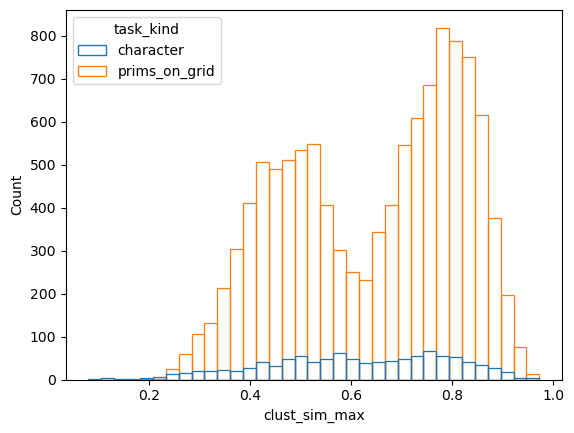

In [30]:
# sns.histplot(data=DAT, x="clust_sim_max", hue="task_kind", fill=False)

In [45]:
DAT = append_col_with_grp_index(DAT, ["clust_WHICH_BASIS", "task_kind"], "clust_WHICH_BASIS|task_kind")
DAT = append_col_with_grp_index(DAT, ["clust_ANIMAL", "task_kind"], "clust_ANIMAL|task_kind")

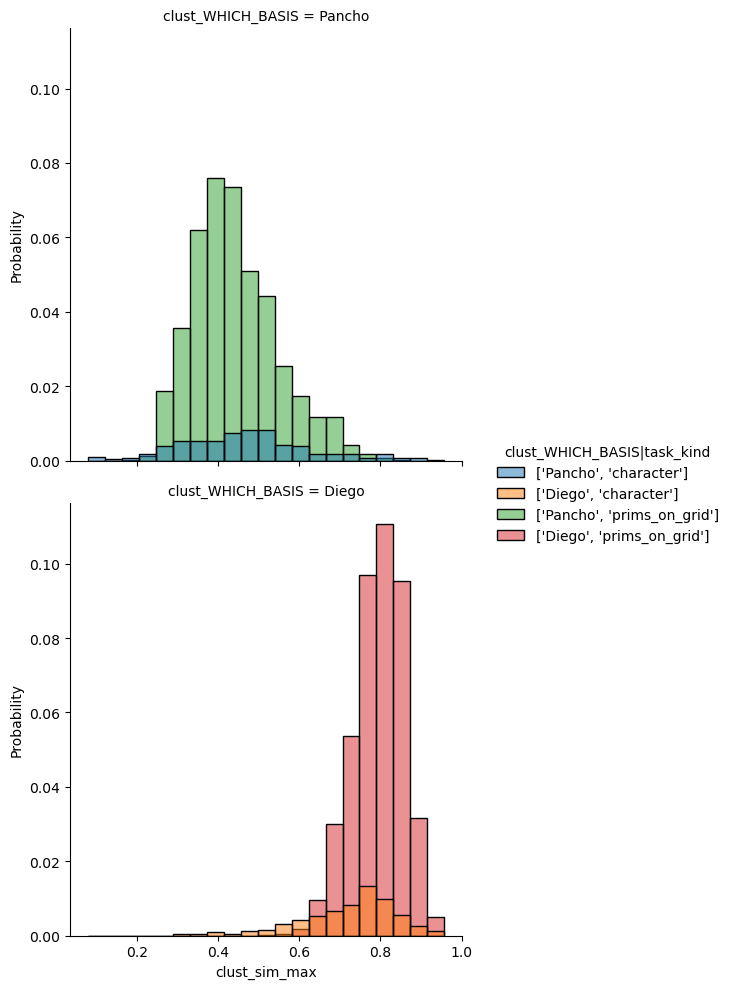

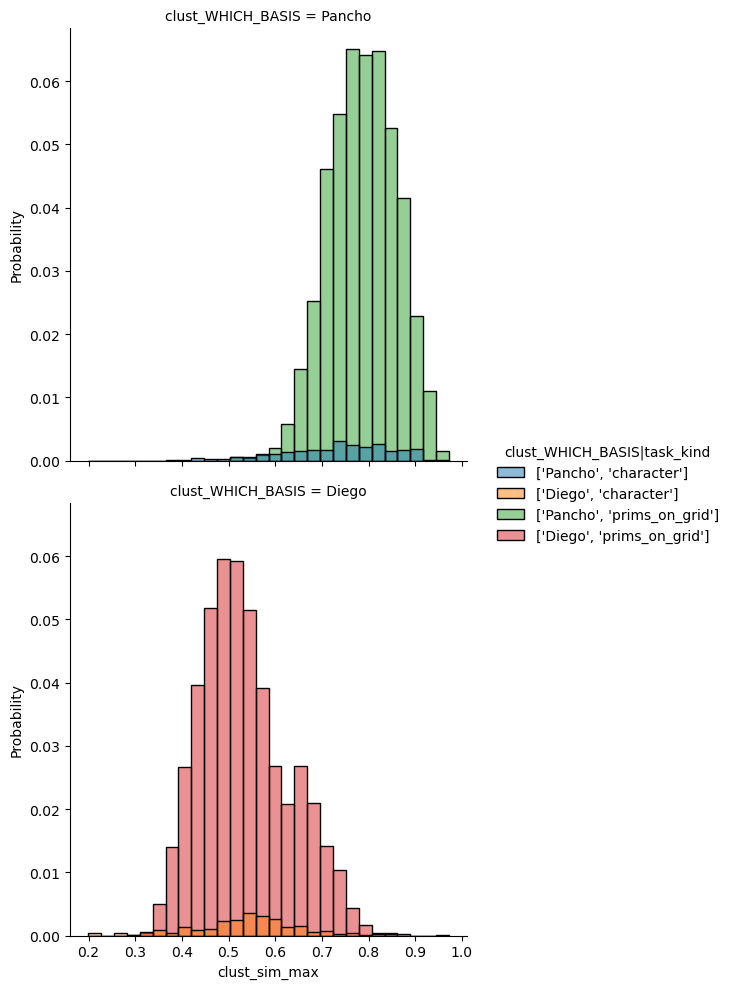

In [43]:
##### For each subject, overlay histograms 
for animal in ["Diego", "Pancho"]:
    dfthis = DAT[DAT["clust_ANIMAL"]==animal]
    
#     sns.pairplot(data=dfthis, vars=["clust_sim_max"], hue="clust_WHICH_BASIS|task_kind", diag_kws={})
#     sns.histplot(data=dfthis, x="clust_sim_max", hue="clust_WHICH_BASIS|task_kind", stat="probability")
    sns.displot(data=dfthis, x="clust_sim_max", hue="clust_WHICH_BASIS|task_kind", row="clust_WHICH_BASIS", 
                stat="probability");
    

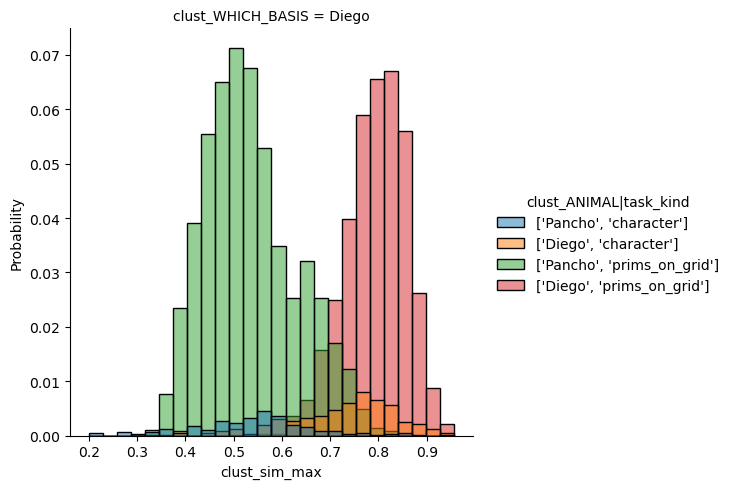

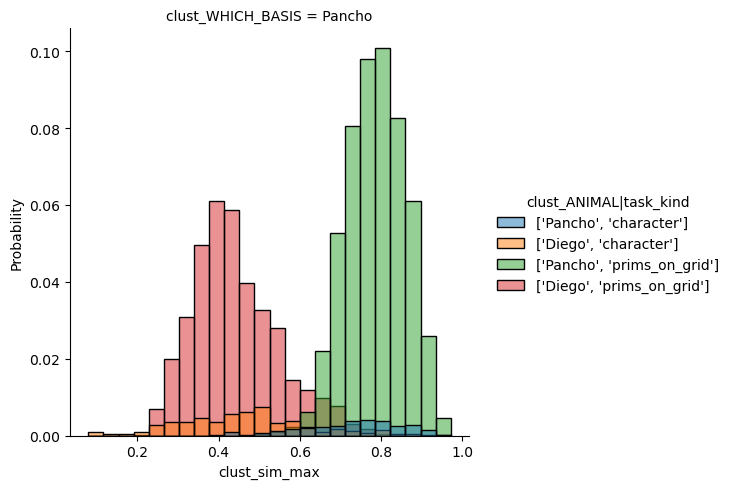

In [49]:
for which_BASIS in ["Diego", "Pancho"]:
    dfthis = DAT[DAT["clust_WHICH_BASIS"]==which_BASIS]
    
#     sns.pairplot(data=dfthis, vars=["clust_sim_max"], hue="clust_WHICH_BASIS|task_kind", diag_kws={})
#     sns.histplot(data=dfthis, x="clust_sim_max", hue="clust_WHICH_BASIS|task_kind", stat="probability")
    sns.displot(data=dfthis, x="clust_sim_max", hue="clust_ANIMAL|task_kind", row="clust_WHICH_BASIS", 
                stat="probability");


##### Overlaying histograms, hand-tailored for Kavli talk
--> Make this general

In [118]:
savedir = f"{SAVEDIR}/distributions"
os.makedirs(savedir, exist_ok=True)

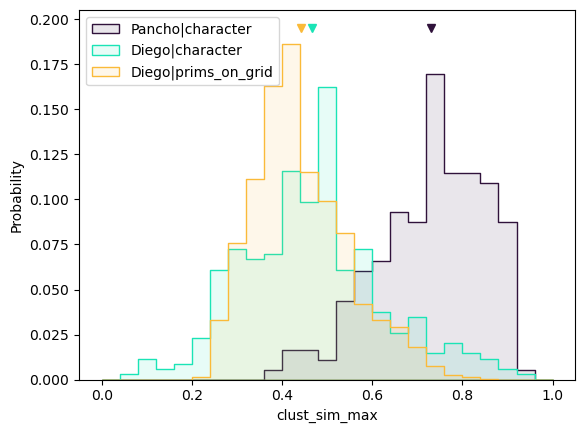

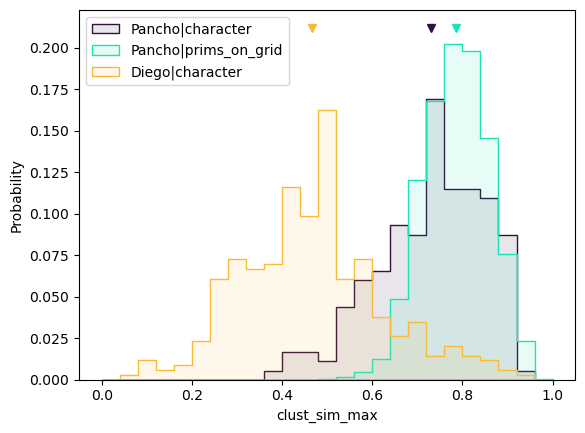

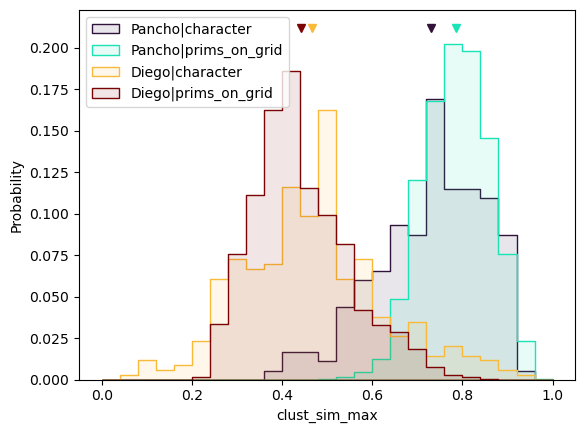

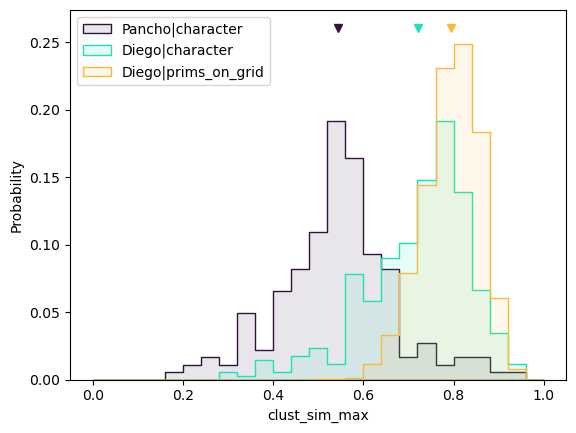

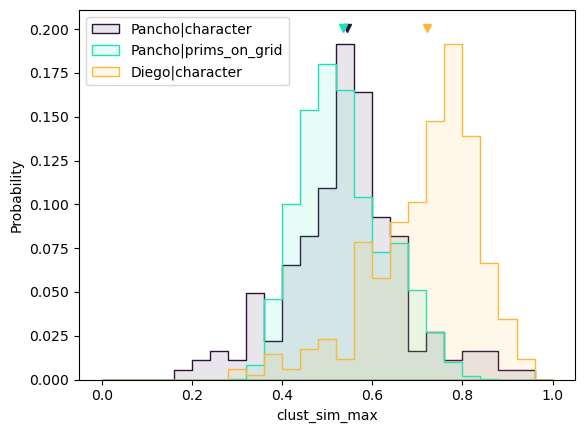

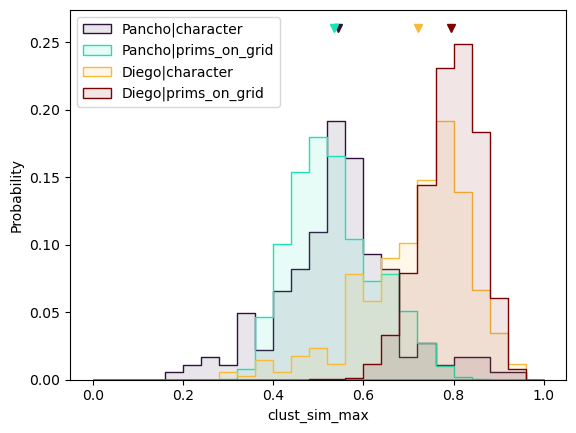

In [120]:
### PARAMS
for WHICH_BASIS in ["Pancho", "Diego"]:
    for EXCLUDE in [
        ["Pancho", "prims_on_grid"],
        ["Diego", "prims_on_grid"],
        None
        ]:
        
#         WHICH_BASIS = "Pancho"
#         EXCLUDE = ["Diego", "prims_on_grid"]

        # RUN
        fig, ax = plt.subplots()
        list_task_kind = sorted(DAT["task_kind"].unique().tolist())
        list_ANIMAL = ["Pancho", "Diego"]
        nbins = 25
        from pythonlib.tools.plottools import makeColors
        pcols = makeColors(len(list_ANIMAL)*len(list_task_kind))

        i=0
        for clust_ANIMAL in list_ANIMAL:
            for task_kind in list_task_kind:
                if EXCLUDE and clust_ANIMAL==EXCLUDE[0] and task_kind==EXCLUDE[1]:
                    continue
                dfthis = DAT[(DAT["clust_ANIMAL"]==clust_ANIMAL) & (DAT["task_kind"]==task_kind) & (DAT["clust_WHICH_BASIS"]==WHICH_BASIS)]
                col = pcols[i]
                leg = f"{clust_ANIMAL}|{task_kind}"
                sns.histplot(data=dfthis, x="clust_sim_max", stat="probability", color=col,  
                             ax=ax, bins=np.linspace(0, 1, nbins+1), element="step", alpha=0.1, label=leg, )
        #         sns.displot(data=dfthis, x="clust_sim_max", hue="clust_WHICH_BASIS|task_kind", row="clust_WHICH_BASIS", 
        #                     stat="probability");
                i+=1
        ax.legend()

        # Plot means. Do it here so that it is at the ymax
        YMAX = ax.get_ylim()[1]
        i=0
        for clust_ANIMAL in list_ANIMAL:
            for task_kind in list_task_kind:
                if EXCLUDE and  clust_ANIMAL==EXCLUDE[0] and task_kind==EXCLUDE[1]:
                    continue
                dfthis = DAT[(DAT["clust_ANIMAL"]==clust_ANIMAL) & (DAT["task_kind"]==task_kind) & (DAT["clust_WHICH_BASIS"]==WHICH_BASIS)]
                col = pcols[i]


                # Place marker for mean
                valmean = np.mean(dfthis["clust_sim_max"])
                ax.plot(valmean, YMAX, "v", color=col)
                i+=1

        # Save
        savefig(fig, path=f"{savedir}/distributions-basis_{WHICH_BASIS}-exclude_{EXCLUDE}.pdf")


In [ ]:
# sns.catplot(data=DAT, x="clust_sim_max", y="clust_ANIMAL", hue="clust_WHICH_BASIS", kind="violin")
sns.catplot(data=DAT, x="clust_ANIMAL", y="clust_sim_max", hue="clust_WHICH_BASIS", kind="violin")

##### Scatter plot, for each stroke from a given animal_date, its max sim across the two basis sets

In [ ]:
# - give each stroke a unique id across all dataset
DAT = append_col_with_grp_index(DAT, ["clust_ANIMAL", "dataset_trialcode", "stroke_index"], "stroke_ID", use_strings=False)

In [ ]:
from pythonlib.tools.pandastools import aggregGeneral, pivot_table
aggregGeneral(DAT, ["stroke_ID", "clust_WHICH_BASIS"], values=["clust_sim_max"])


In [ ]:
DAT_WIDE = pivot_table(DAT, index=["stroke_ID", "clust_ANIMAL"], columns=["clust_WHICH_BASIS"], 
                  values=["clust_sim_max"], flatten_col_names=True, )


In [ ]:
fig = sns.pairplot(data=DAT_WIDE, vars=["clust_sim_max-Diego", "clust_sim_max-Pancho"], hue="clust_ANIMAL",
                  plot_kws={"alpha":0.3}, height=3.5);
# fig.axes.flatten()[1].set_aspect('equal', adjustable='box')
fig.axes.flatten()[1].plot([0, 1], [0, 1], "-k", alpha=0.5)
fig.axes.flatten()[2].plot([0, 1], [0, 1], "-k", alpha=0.5)



In [ ]:
%matplotlib inline
fig = sns.pairplot(data=DAT_WIDE, vars=["clust_sim_max-Diego", "clust_sim_max-Pancho"], hue="clust_ANIMAL",
                  plot_kws={"alpha":0.3}, height=3.5);
# fig.axes.flatten()[1].set_aspect('equal', adjustable='box')
fig.axes.flatten()[1].plot([0, 1], [0, 1], "-k", alpha=0.5)
fig.axes.flatten()[2].plot([0, 1], [0, 1], "-k", alpha=0.5)



for animal_dat in ["Pancho", "Diego"]:
    dfthis = DAT_WIDE[DAT_WIDE["clust_ANIMAL"]==animal_dat]
    fig = sns.pairplot(data=dfthis, vars=["clust_sim_max-Diego", "clust_sim_max-Pancho"], hue="clust_ANIMAL",
                      plot_kws={"alpha":0.3}, height=3.5);
    # fig.axes.flatten()[1].set_aspect('equal', adjustable='box')
    fig.axes.flatten()[1].plot([0, 1], [0, 1], "-k", alpha=0.5)
    fig.axes.flatten()[2].plot([0, 1], [0, 1], "-k", alpha=0.5)



In [ ]:
# Scatter plot, for each char(agg over strokes), conditioned on a given basis set, its, max sim across 

DAT_WIDE = pivot_table(DAT, index=["character", "clust_ANIMAL"], columns=["clust_WHICH_BASIS"], 
                  values=["clust_sim_max"], flatten_col_names=True, )
DAT_WIDE

In [ ]:
fig = sns.pairplot(data=DAT_WIDE, vars=["clust_sim_max-Diego", "clust_sim_max-Pancho"], hue="clust_ANIMAL",
                  plot_kws={"alpha":0.3}, height=3.5);
# fig.axes.flatten()[1].set_aspect('equal', adjustable='box')
fig.axes.flatten()[1].plot([0, 1], [0, 1], "-k", alpha=0.5)
fig.axes.flatten()[2].plot([0, 1], [0, 1], "-k", alpha=0.5)


### OTHERSm

In [ ]:
his-sims_
beh_motor_sim-heatmap
scoredist_shapes-1

Everything in clustering_by_basis_prims